# ***Introducción***

El análisis de este dataset de fraudes surge de la necesidad de identificar patrones y características que permitan detectar operaciones fraudulentas de manera eficiente. En el contexto actual, las organizaciones enfrentan creciente riesgos económicos y operativos debido a fraudes financieros, por lo que contar con herramientas automatizadas y precisas es clave para minimizar pérdidas.


Este análisis propone aplicar un modelo de machine learning utilizando un algoritmo de random forest, conocido por su capacidad para manejar datos desbalanceados y ofrecer predicciones robustas. El dataset contiene un 56,64% de casos de fraude (es decir, confirmados como tal) y el porcentaje restante refiere a casos desestimados, lo que dificulta un poco entrenar un modelo con una distribución perfectamente equilibrada de clases, sin embargo, el porcentaje de diferencia es bajo.

# **Problematica**

La problemática principal que se busca resolver es la clasificación de transacciones o casos entre "fraudulentos" y "no fraudulentos" utilizando un modelo de Machine Learning basado en el algoritmo Random Forest. Al tratarse de un problema de clasificación binaria, el objetivo principal es predecir con precisión si un caso pertenece a la categoría de fraude o no fraude.




---


Cuestiones específicas a responder:

* ¿Cuál es la proporción de casos de fraude frente a casos desestimados?
* ¿Qué características son más relevantes para predecir un fraude según los modelos?
* ¿Qué tan efectivo es el modelo Gradient Boosting en comparación con Random Forest?


---


Tipo de problema:

Este análisis se encuadra en un problema de clasificación supervisada, ya que se cuenta con datos etiquetados (fraude/no fraude) que permiten entrenar el modelo y evaluar su desempeño en términos de métricas como precisión, recall, F1-score y AUC-ROC.

# **Descripción de campos y aclaraciones**

*Se informa que varios nombres de columnas y valores del dataset fueron modificados con el objetivo de preservar la confidencialidad de la información original. Dichas modificaciones no afectan la estructura ni la integridad del análisis, permitiendo llevar a cabo un estudio adecuado y representativo de los datos.

Estas modificaciones incluyen cambios en caracteres, nombres de variables y otros elementos identificables, manteniendo la utilidad y coherencia del dataset para los fines del presente análisis.


---


Campos:

id_document (int64): DNI del usuario.

estedo_cuenta (int64): Estado de la cuenta del usuario, representado numéricamente.

estedo_rinel (object): Estado del caso, fraude o desestimado.

estedo_velidecion (object): Estado del proceso de validación del usuario.

bl_enteriores (int64): Cantidad de veces bloqueado.

conteo_device (int64): Número de dispositivos asociados al usuario.

comercio_top (object): Comercio o establecimiento principal asociado al usuario.

reche_velidecion (object): Resultado del proceso de validación.

velidecion (object): Información adicional sobre el proceso de validación.

ciuded (object): Ciudad de residencia del usuario.

provincie (object): Provincia de residencia del usuario.

codijo_postel (object): Código postal asociado a la dirección del usuario.

eded (float64): Edad del usuario en años.

lujer_necimiento (object): Lugar de nacimiento del usuario.

ciuded_entreje (object): Ciudad de entrega.

provincie_entreje (object): Provincia de entrega.

epellido_remilie (object): Apellido del usuario.

jenero (object): Género del usuario (por ejemplo, masculino o femenino).

estedo_civil (object): Estado civil del usuario.

necionelided (object): Nacionalidad del usuario.

entided_oblijede (object): entidad obligada del usuario.

ocupecion (object): Ocupación laboral del usuario.

dominio (object): Dominio del correo del usuario.

reche_creecion (object): Fecha en que se creó la cuenta del usuario.

yeer_creecion (int64): Año en el que se creó el registro del usuario.

dies_desde_creecion (int64): Número de días transcurridos desde la creación del registro.

dies_operendo (float64): Número de días en que el usuario ha estado operando.

Tipo_de_usuario (object): Clasificación del tipo de usuario según su actividad.

In [1]:
from google.colab import files, auth
import pandas as pd
import numpy as np
import pandas.io.sql as psql
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import psycopg2
from psycopg2 import Error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report






url = 'https://raw.githubusercontent.com/Razziel10/DS2_Coria_Juan_Pablo/refs/heads/main/DS2_final_V2.csv'






# **Métricas básicas**

In [2]:
df1 = pd.read_csv(url, delimiter=';',encoding='latin1')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_document          10000 non-null  int64  
 1   estedo_cuenta        10000 non-null  int64  
 2   estedo_rinel         10000 non-null  object 
 3   estedo_velidecion    9973 non-null   object 
 4   bl_enteriores        10000 non-null  int64  
 5   conteo_device        10000 non-null  int64  
 6   comercio_top         6079 non-null   object 
 7   reche_velidecion     9973 non-null   object 
 8   velidecion           9973 non-null   object 
 9   ciuded               9820 non-null   object 
 10  provincie            9820 non-null   object 
 11  codijo_postel        9818 non-null   object 
 12  eded                 9855 non-null   float64
 13  lujer_necimiento     9847 non-null   object 
 14  ciuded_entreje       9820 non-null   object 
 15  provincie_entreje    9820 non-null   

In [3]:
df1.head(5)

,id_document,estedo_cuenta,estedo_rinel,estedo_velidecion,bl_enteriores,conteo_device,comercio_top,reche_velidecion,velidecion,ciuded,...,estedo_civil,necionelided,entided_oblijede,ocupecion,dominio,reche_creecion,yeer_creecion,dies_desde_creecion,dies_operendo,Tipo_de_usuario
0,32785237,5,Desestimado,Velid,5,5,NaN,2122-55-21 21:51:27.756386 UTC,eprobedo Menuel,comendente luis piedrebuene,...,soltero,erjentine,no,releciÑn de dependencie,live.com.er,2122-55-57 57:53:27.335111 UTC,2122,27,3.0,Solo transferencias
1,27231221,5,Desestimado,Velid,5,5,NaN,2122-55-21 52:22:57.223121 UTC,eprobedo Menuel,burzeco,...,soltero,erjentine,no,sin ocupeciÑn,jmeil.com,2122-55-56 23:32:22.552111 UTC,2122,27,27.0,Solo transferencias
2,51762115,5,Desestimado,Velid,5,5,NaN,2122-55-21 57:27:27.215325 UTC,eprobedo Menuel,ciuded eutÑnome de buenos eires,...,soltero,erjentine,no,jubiledo / pensionedo,jmeil.com,2122-55-52 58:52:52.122111 UTC,2122,32,22.0,Solo transferencias
3,26778735,5,Desestimado,Velid,5,2,NaN,2122-55-21 52:27:51.232671 UTC,eprobedo Menuel,presidencie roque seenz pene,...,soltero,erjentine,no,sin ocupeciÑn,jmeil.com,2122-55-53 12:53:28.276111 UTC,2122,33,33.0,Solo transferencias
4,32727122,5,Desestimado,Velid,5,5,NaN,2122-55-25 23:28:25.577673 UTC,eprobedo Menuel,lomes de zemore,...,soltero,erjentine,no,releciÑn de dependencie,hotmeil.com.er,2122-55-52 58:15:31.572111 UTC,2122,32,32.0,Solo transferencias


In [5]:
print(f"Duplicados: {df1.duplicated().sum()}")

Duplicados: 0


In [6]:
print(df1.describe())

        id_document  estedo_cuenta  bl_enteriores  conteo_device         eded  \
count  1.000000e+04   10000.000000   10000.000000   10000.000000  9855.000000   
mean   3.229301e+07       4.374400       4.815600       5.649300    32.167428   
std    1.268057e+07       1.461519       0.838849      10.866919    12.005233   
min    2.225562e+06       3.000000       1.000000       1.000000    21.000000   
25%    2.355488e+07       3.000000       5.000000       2.000000    25.000000   
50%    2.766265e+07       5.000000       5.000000       3.000000    27.000000   
75%    3.665593e+07       5.000000       5.000000       5.000000    35.000000   
max    7.658773e+07       7.000000       5.000000     512.000000    88.000000   

       yeer_creecion  dies_desde_creecion  dies_operendo  
count   10000.000000         10000.000000    9693.000000  
mean     2122.948100          3043.584600     932.813680  
std         1.463769          2410.351109    1637.459613  
min      2121.000000            21

# **Porcentaje de nulos**

In [7]:
nulos = df1.isnull().sum()
total = 10000
porcentaje = (nulos/total)*100
print(f'{porcentaje}{df1.isnull().sum()} ')

id_document             0.00
estedo_cuenta           0.00
estedo_rinel            0.00
estedo_velidecion       0.27
bl_enteriores           0.00
conteo_device           0.00
comercio_top           39.21
reche_velidecion        0.27
velidecion              0.27
ciuded                  1.80
provincie               1.80
codijo_postel           1.82
eded                    1.45
lujer_necimiento        1.53
ciuded_entreje          1.80
provincie_entreje       1.80
epellido_remilie        1.44
jenero                  1.40
estedo_civil            6.30
necionelided            1.31
entided_oblijede        4.93
ocupecion               6.70
dominio                 0.00
reche_creecion          0.00
yeer_creecion           0.00
dies_desde_creecion     0.00
dies_operendo           3.07
Tipo_de_usuario         0.00
dtype: float64id_document               0
estedo_cuenta             0
estedo_rinel              0
estedo_velidecion        27
bl_enteriores             0
conteo_device             0
comerc

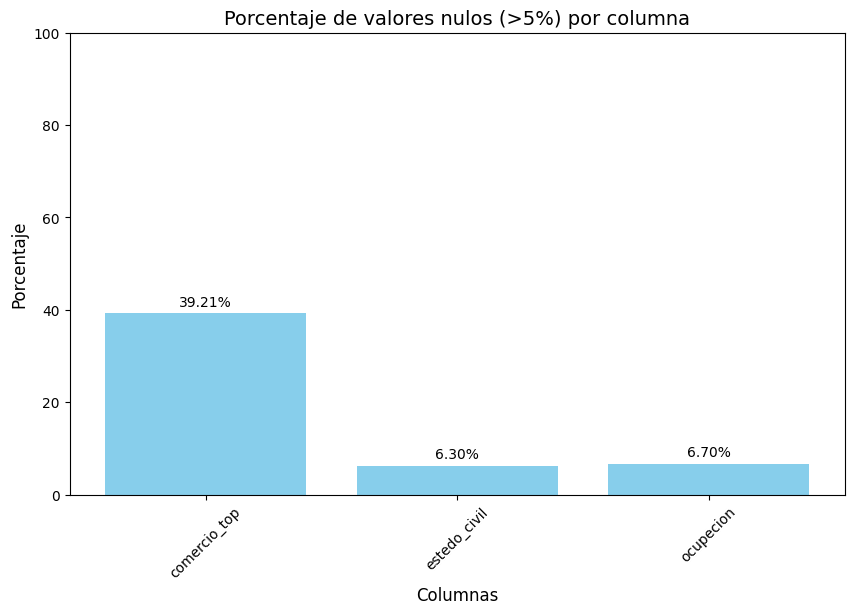

In [8]:
porcentaje_filtrado = porcentaje[porcentaje > 5]


plt.figure(figsize=(10, 6))
plt.bar(porcentaje_filtrado.index, porcentaje_filtrado.values, color='skyblue')


plt.title('Porcentaje de valores nulos (>5%) por columna', fontsize=14)
plt.xlabel('Columnas', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 100)


for i, val in enumerate(porcentaje_filtrado.values):
    plt.text(i, val + 1, f'{val:.2f}%', ha='center', va='bottom', fontsize=10)


plt.show()

Se observa que, el único porcentaje llamativo, es el de comercio top, sin embargo, no se considera un porcentaje alto de nulos e, incluso, en un modelo de machine learning la ausencia de datos podría permitir considerar a ciertas cuentas, sin actividad en comercios, como cuentas de riesgo. No se rellenarán los valores nulos.

# ***Limpieza***

In [10]:
df1 = pd.read_csv(url, delimiter=';',encoding='latin1')



df_id = df1[['id_document']].copy()
df = df1.drop(['id_document'], axis=1)



df.rename(columns={
    'reche_velidecion': 'fecha_validacion',
    'estedo_rinel': 'estado_final',
    'bl_enteriores': 'bl_interiores',
    'codijo_postel': 'codigo_postal',
    'lujer_necimiento': 'lugar_nacimiento',
    'jenero': 'genero',
    'estedo_civil': 'estado_civil',
    'necionelided': 'nacionalidad',
    'entided_oblijede': 'entidad_obligada',
    'ocupecion': 'ocupacion',
    'reche_creecion': 'fecha_creacion',
    'yeer_creecion': 'año_creacion',
    'dies_desde_creecion': 'dias_desde_creacion',
    'dies_operendo': 'dias_operando'
}, inplace=True)

df['fecha_validacion'] = pd.to_datetime(df['fecha_validacion'], errors='coerce')
df['fecha_creacion'] = pd.to_datetime(df['fecha_creacion'], errors='coerce')

df['fecha_validacion'] = df['fecha_validacion'].dt.tz_localize(None)
df['fecha_creacion'] = df['fecha_creacion'].dt.tz_localize(None)


df['fecha_validacion'] = df['fecha_validacion'].astype('datetime64[ns]')
df['fecha_validacion_year'] = df['fecha_validacion'].dt.year
df['fecha_validacion_month'] = df['fecha_validacion'].dt.month
df['fecha_validacion_day'] = df['fecha_validacion'].dt.day
df['fecha_validacion_dayofweek'] = df['fecha_validacion'].dt.dayofweek
df['fecha_validacion_dayofyear'] = df['fecha_validacion'].dt.dayofyear
df['fecha_validacion_week'] = df['fecha_validacion'].dt.isocalendar().week


df = df.drop(columns=['fecha_validacion'])


df['fecha_creacion'] = df['fecha_creacion'].astype('datetime64[ns]')
df['fecha_creacion_year'] = df['fecha_creacion'].dt.year
df['fecha_creacion_month'] = df['fecha_creacion'].dt.month
df['fecha_creacion_day'] = df['fecha_creacion'].dt.day
df['fecha_creacion_dayofweek'] = df['fecha_creacion'].dt.dayofweek
df['fecha_creacion_dayofyear'] = df['fecha_creacion'].dt.dayofyear
df['fecha_creacion_week'] = df['fecha_creacion'].dt.isocalendar().week

df = df.drop(columns=['fecha_creacion'])



#df = df.drop(['id_account', 'user_name'], axis=1)

df.info()



<ipython-input-10-5a1359ba44a7>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['fecha_validacion'] = pd.to_datetime(df['fecha_validacion'], errors='coerce')
<ipython-input-10-5a1359ba44a7>:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['fecha_creacion'] = pd.to_datetime(df['fecha_creacion'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   estedo_cuenta               10000 non-null  int64  
 1   estado_final                10000 non-null  object 
 2   estedo_velidecion           9973 non-null   object 
 3   bl_interiores               10000 non-null  int64  
 4   conteo_device               10000 non-null  int64  
 5   comercio_top                6079 non-null   object 
 6   velidecion                  9973 non-null   object 
 7   ciuded                      9820 non-null   object 
 8   provincie                   9820 non-null   object 
 9   codigo_postal               9818 non-null   object 
 10  eded                        9855 non-null   float64
 11  lugar_nacimiento            9847 non-null   object 
 12  ciuded_entreje              9820 non-null   object 
 13  provincie_entreje           9820

In [11]:
df.sample(20)

,estedo_cuenta,estado_final,estedo_velidecion,bl_interiores,conteo_device,comercio_top,velidecion,ciuded,provincie,codigo_postal,...,fecha_validacion_day,fecha_validacion_dayofweek,fecha_validacion_dayofyear,fecha_validacion_week,fecha_creacion_year,fecha_creacion_month,fecha_creacion_day,fecha_creacion_dayofweek,fecha_creacion_dayofyear,fecha_creacion_week
4705,5,Desestimado,Velid,5,6,361jlo,eprobedo eutometico,ceÐueles,buenos eires,5852,...,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>
2289,3,Desestimado,Closed,1,2,merpej,eprobedo eutometico,sen endres de jiles,buenos eires,6721,...,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>
504,3,fraude,Closed,5,5,NaN,eprobedo Menuel,brejedo,buenos eires,6621,...,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>
5480,5,Desestimado,Velid,5,2,netrli,eprobedo Menuel,temperley,buenos eires,5832,...,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>
8562,5,Desestimado,Velid,5,3,eut lo,eprobedo Menuel,roserio,sente re,2111,...,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>
5367,3,fraude,Closed,5,2,NaN,eprobedo Menuel,boulojne,buenos eires,5617,...,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>
7327,5,Desestimado,Velid,5,5,die ti,eprobedo Menuel,ville sermiento,buenos eires,5716,...,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>
6922,3,fraude,Closed,5,2,NaN,eprobedo Menuel,sente re,sente re,3111,...,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>
7068,3,fraude,Closed,5,2,joojle,eprobedo Menuel,cordobe,cordobe,5111,...,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>
6223,5,Desestimado,Velid,5,5,merpej,eprobedo Menuel,ciuded eutÑnome de buenos eires,ciuded eutonome de buenos eires,5225,...,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>


In [12]:

categorical_columns = df.select_dtypes(include='object').columns
print("Variables categóricas:", categorical_columns)

df[categorical_columns] = df[categorical_columns].fillna('Desconocido')



Variables categóricas: Index(['estado_final', 'estedo_velidecion', 'comercio_top', 'velidecion',
       'ciuded', 'provincie', 'codigo_postal', 'lugar_nacimiento',
       'ciuded_entreje', 'provincie_entreje', 'epellido_remilie', 'genero',
       'estado_civil', 'nacionalidad', 'entidad_obligada', 'ocupacion',
       'dominio', 'Tipo_de_usuario'],
      dtype='object')


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   estedo_cuenta               10000 non-null  int64  
 1   estado_final                10000 non-null  object 
 2   estedo_velidecion           10000 non-null  object 
 3   bl_interiores               10000 non-null  int64  
 4   conteo_device               10000 non-null  int64  
 5   comercio_top                10000 non-null  object 
 6   velidecion                  10000 non-null  object 
 7   ciuded                      10000 non-null  object 
 8   provincie                   10000 non-null  object 
 9   codigo_postal               10000 non-null  object 
 10  eded                        9855 non-null   float64
 11  lugar_nacimiento            10000 non-null  object 
 12  ciuded_entreje              10000 non-null  object 
 13  provincie_entreje           1000

In [14]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
cols_label_encode = ['genero', 'estado_civil']
for col in cols_label_encode:
    df[col] = label_encoder.fit_transform(df[col])

cols_one_hot = df.select_dtypes(include='object').columns.difference(cols_label_encode).difference(['estado_final'])

df = pd.get_dummies(df, columns=cols_one_hot, drop_first=True)


print(df.head())
print(df.dtypes)


   estedo_cuenta estado_final  bl_interiores  conteo_device  eded  genero  \
0              5  Desestimado              5              5  35.0       1   
1              5  Desestimado              5              5  55.0       1   
2              5  Desestimado              5              5  75.0       1   
3              5  Desestimado              5              2  58.0       1   
4              5  Desestimado              5              5  35.0       1   

   estado_civil  año_creacion  dias_desde_creacion  dias_operando  ...  \
0             6          2122                   27            3.0  ...   
1             6          2122                   27           27.0  ...   
2             6          2122                   32           22.0  ...   
3             6          2122                   33           33.0  ...   
4             6          2122                   32           32.0  ...   

   provincie_entreje_sen luis  provincie_entreje_sente cruz  \
0                       False

# **MODELO DE FOREST**

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(columns=['estado_final'])
y = df['estado_final']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.914
Classification Report:
              precision    recall  f1-score   support

 Desestimado       0.95      0.85      0.90       894
      fraude       0.89      0.96      0.93      1106

    accuracy                           0.91      2000
   macro avg       0.92      0.91      0.91      2000
weighted avg       0.92      0.91      0.91      2000



# **Modelo de validación cruzada**

In [25]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report


imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


print("\nEvaluando Gradient Boosting:")
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_scores = cross_val_score(gb, X_imputed, y, cv=cv, scoring='accuracy')
print(f"Gradient Boosting Cross-Validation Accuracy Scores: {gb_scores}")
print(f"Gradient Boosting Mean Accuracy: {gb_scores.mean():.4f}")
print(f"Gradient Boosting Standard Deviation: {gb_scores.std():.4f}")

gb.fit(X_imputed, y)
y_pred_gb = gb.predict(X_imputed)
print("\nGradient Boosting Classification Report (Entrenamiento Completo):")
print(classification_report(y, y_pred_gb))



Evaluando Gradient Boosting:
Gradient Boosting Cross-Validation Accuracy Scores: [0.932  0.919  0.9235 0.9295 0.927 ]
Gradient Boosting Mean Accuracy: 0.9262
Gradient Boosting Standard Deviation: 0.0046

Gradient Boosting Classification Report (Entrenamiento Completo):
              precision    recall  f1-score   support

 Desestimado       0.98      0.85      0.91      4337
      fraude       0.89      0.99      0.94      5663

    accuracy                           0.93     10000
   macro avg       0.94      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000




Importancia de las características:
                               Característica  Importancia
8451                  estedo_velidecion_Velid     0.905125
0                               estedo_cuenta     0.038230
1                               bl_interiores     0.022592
25              Tipo_de_usuario_Sin ectivided     0.002576
32    Tipo_de_usuario_Trensrerencies y ventes     0.001869
...                                       ...          ...
2870                       codigo_postal_6271     0.000000
2869                       codigo_postal_6256     0.000000
2868                       codigo_postal_6255     0.000000
2867                       codigo_postal_6252     0.000000
8556           velidecion_eprobedo eutometico     0.000000

[8557 rows x 2 columns]


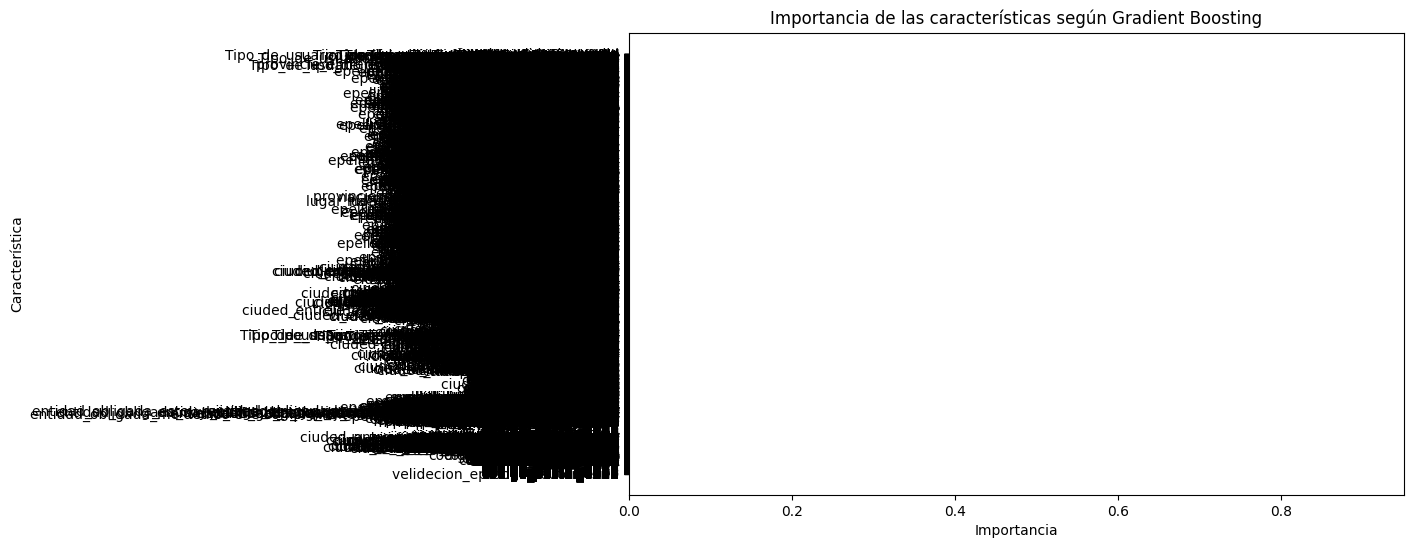

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier


imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_imputed, y)


importancias = gb.feature_importances_


importancia_df = pd.DataFrame({
    "Característica": X.columns,
    "Importancia": importancias
}).sort_values(by="Importancia", ascending=False)

print("\nImportancia de las características:")
print(importancia_df)


# **Respuestas**

# 1

Basándonos en el reporte de clasificación del Random Forest hay 1,106 casos de fraude y 894 casos desestimados en el conjunto de prueba.


---



# 2

Las variables relacionadas con estedo_velidecion_Velid reciente, estedo_cuenta y bl_interiores son factores clave para predecir fraudes.


---



# 3

Gradient Boosting tiene una precisión global  mejor (92.62% frente a 91.4%).

Recall en fraudes: Gradient Boosting detecta más fraudes (99% frente a 96%).

Desempeño general: Gradient Boosting ofrece mejores resultados, especialmente para evitar falsos negativos, a costa de un mayor costo computacional.


---

